In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from plotly import express as px
from plotly import graph_objects as go
import dash
from dash import dcc
from dash import html
import string

In [8]:
start_time = datetime.datetime.now()

data = pd.read_excel('/Users/tinashem/Github Repos/CareerPalz/files/LCA_Disclosure_Data_FY2023_final_copy.xlsx')

end_time = datetime.datetime.now()

print('Duration: {}'.format(end_time - start_time))

Duration: 0:15:13.131554


In [9]:
data.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23244-317261,Certified - Withdrawn,2023-09-01,2023-09-30,2023-09-11,H-1B,"Analyst, Business Sr",15-2031.00,Operations Research Analysts,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-202-23242-306442,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B1 Singapore,Board Certified Behavior Analyst,19-3034.00,School Psychologists,Y,...,NaN,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-23242-308144,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B,Manager - Software Engineering,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Sheppard,Kaitlyn (11606.425.22),NaN,Berry Appleman & Leiden LLP,ksheppard@bal.com
3,I-200-23172-131625,Certified - Withdrawn,2023-06-21,2023-09-30,2023-06-28,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-23170-125146,Certified - Withdrawn,2023-06-19,2023-09-30,2023-06-26,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644607 entries, 0 to 644606
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     644607 non-null  object        
 1   CASE_STATUS                     644607 non-null  object        
 2   RECEIVED_DATE                   644607 non-null  datetime64[ns]
 3   DECISION_DATE                   644607 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              17250 non-null   datetime64[ns]
 5   VISA_CLASS                      644607 non-null  object        
 6   JOB_TITLE                       644607 non-null  object        
 7   SOC_CODE                        644607 non-null  object        
 8   SOC_TITLE                       644607 non-null  object        
 9   FULL_TIME_POSITION              644607 non-null  object        
 10  BEGIN_DATE                      644607 non-null  datetim

In [11]:
data['JOB_TITLE'] = [string.capwords(x, sep=None) for x in data['JOB_TITLE']]

In [12]:
data['NEW_EMPLOYMENT'].nunique()

48

In [13]:
data['NEW_EMPLOYMENT'].unique()

array([   0,    1,    3,    5,    2,   50,   75,   12,   25,   20,    4,
         30,   10,   22,    8,    6,   13,   15,    7,  300,  100,   37,
          9,   14,  223, 1098,   11,   40,   60,   80,   33,   27,   21,
         35,   70,   19,   26,  250,   28,   17,   24,   99,   41,  150,
         18,   32,   29,   23])

In [14]:
data['NEW_EMPLOYMENT'].value_counts()

NEW_EMPLOYMENT
0       436195
1       191452
5         4133
2         2743
10        2726
4         1489
30        1191
50         988
6          981
3          636
100        521
75         416
20         413
25         244
15         182
8           56
7           45
12          43
70          25
40          20
60          19
9           11
11           9
21           6
18           6
250          6
150          6
300          5
35           5
99           3
13           3
14           3
17           3
41           2
32           2
29           2
23           2
26           2
27           2
80           2
22           2
28           1
19           1
24           1
33           1
1098         1
37           1
223          1
Name: count, dtype: int64

In [15]:
# let's create a separate data frame for entries that have new employment and are full-time positions
new_employment = data[(data['NEW_EMPLOYMENT'] != 0) & (data['FULL_TIME_POSITION'] == 'Y')]
new_employment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205351 entries, 3 to 644597
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     205351 non-null  object        
 1   CASE_STATUS                     205351 non-null  object        
 2   RECEIVED_DATE                   205351 non-null  datetime64[ns]
 3   DECISION_DATE                   205351 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              6199 non-null    datetime64[ns]
 5   VISA_CLASS                      205351 non-null  object        
 6   JOB_TITLE                       205351 non-null  object        
 7   SOC_CODE                        205351 non-null  object        
 8   SOC_TITLE                       205351 non-null  object        
 9   FULL_TIME_POSITION              205351 non-null  object        
 10  BEGIN_DATE                      205351 non-null  datetime64[n

In [16]:
# let's find out the number of unique employers who have new employment
new_employment['EMPLOYER_NAME'].nunique()

33100

In [17]:
new_employment['EMPLOYER_NAME'].unique()

array(['Edvenswa Tech Inc', 'Mateu Architecture, Inc.',
       'Propel Infotech Inc', ..., 'VF Outdoor, LLC', 'Finch Brands, LLC',
       'DARTMOUTH-HITCHCOCK CLINIC'], dtype=object)

In [18]:
# let's investigate how many new employers had certified LCA's
new_employment['CASE_STATUS'].unique()

array(['Certified - Withdrawn', 'Withdrawn', 'Denied', 'Certified'],
      dtype=object)

In [19]:
# let's investigate how many new employers had certified LCA's
certified = new_employment[new_employment['CASE_STATUS'] == 'Certified']
certified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186524 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     186524 non-null  object        
 1   CASE_STATUS                     186524 non-null  object        
 2   RECEIVED_DATE                   186524 non-null  datetime64[ns]
 3   DECISION_DATE                   186524 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      186524 non-null  object        
 6   JOB_TITLE                       186524 non-null  object        
 7   SOC_CODE                        186524 non-null  object        
 8   SOC_TITLE                       186524 non-null  object        
 9   FULL_TIME_POSITION              186524 non-null  object        
 10  BEGIN_DATE                      186524 non-null  datetime64

In [20]:
certified.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
185,I-200-23267-376299,Certified,2023-09-24,2023-09-29,NaT,H-1B,Postdoctoral Research Fellos,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,...,No,Yes,"Both $60,000 or higher in annual wage and Mast...",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
189,I-200-23267-376413,Certified,2023-09-24,2023-09-29,NaT,H-1B,Associate Director Jc40 - Management Analysts,13-1111.00,Management Analysts,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
194,I-200-23267-376365,Certified,2023-09-24,2023-09-29,NaT,H-1B,Sr. Software Engineer,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Kennedy,Adaikala Mary,NaN,"Law Offices of Mary Kennedy, LLC",legal@mkimmigrationlaw.com
196,I-200-23267-376282,Certified,2023-09-24,2023-09-29,NaT,H-1B,Devops Engineer,15-1251.00,Computer Programmers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
199,I-200-23268-376550,Certified,2023-09-24,2023-09-29,NaT,H-1B,Computer Programmer,15-1251.00,Computer Programmers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Alic,Emina,NaN,"Fakhoury Global Immigration, USA PC",aishwaryat@employmentimmigration.com


In [21]:
# display a maximum of 20 rows
pd.set_option("display.max_rows", 20)

In [22]:
# let's look at how many different job titles were given certified LCA's
certified['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                                     13543
Software Developer                                    10588
Assistant Professor                                    2806
Software Development Engineer I                        2128
Analyst                                                1927
                                                      ...  
Aem Front End Developer                                   1
Public Relationship Specialist                            1
Senior Advisor, Financial And Portfolio Management        1
Technical Officer Iii                                     1
Financial Model Development Senior                        1
Name: count, Length: 38311, dtype: int64

In [23]:
# Were they all H-1B visas?
certified['VISA_CLASS'].value_counts()

VISA_CLASS
H-1B               180307
E-3 Australian       4096
H-1B1 Chile          1340
H-1B1 Singapore       781
Name: count, dtype: int64

In [24]:
certified_h1b = certified[certified['VISA_CLASS'] == 'H-1B']
certified_h1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180307 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     180307 non-null  object        
 1   CASE_STATUS                     180307 non-null  object        
 2   RECEIVED_DATE                   180307 non-null  datetime64[ns]
 3   DECISION_DATE                   180307 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      180307 non-null  object        
 6   JOB_TITLE                       180307 non-null  object        
 7   SOC_CODE                        180307 non-null  object        
 8   SOC_TITLE                       180307 non-null  object        
 9   FULL_TIME_POSITION              180307 non-null  object        
 10  BEGIN_DATE                      180307 non-null  datetime64

In [25]:
certified_h1b['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                         13410
Software Developer                        10541
Assistant Professor                        2797
Software Development Engineer I            2122
Analyst                                    1895
                                          ...  
Business Systems Analyst Ll                   1
Analytics – Senior Manager                    1
Manager, Aras                                 1
Certification Project Technical Leader        1
Financial Model Development Senior            1
Name: count, Length: 36369, dtype: int64

In [26]:
# ['business analyst', 'data analyst', 'data engineer', 'data scientist', 'data']
# let's filter out the job titles that are relevant to data science
data_jobs = certified_h1b[certified_h1b['JOB_TITLE'].str.contains('data', case=False)]
data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9265 entries, 343 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     9265 non-null   object        
 1   CASE_STATUS                     9265 non-null   object        
 2   RECEIVED_DATE                   9265 non-null   datetime64[ns]
 3   DECISION_DATE                   9265 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      9265 non-null   object        
 6   JOB_TITLE                       9265 non-null   object        
 7   SOC_CODE                        9265 non-null   object        
 8   SOC_TITLE                       9265 non-null   object        
 9   FULL_TIME_POSITION              9265 non-null   object        
 10  BEGIN_DATE                      9265 non-null   datetime64[ns]
 11  END_D

In [27]:
data_jobs['JOB_TITLE'].value_counts()

JOB_TITLE
Data Scientist                                   1279
Data Engineer                                    1227
Data Analyst                                      770
Database Administrator                            311
Data Engineer I                                   214
                                                 ... 
Oracle Database Administrator (dba)                 1
Data Engineer 20516.3348.10                         1
Oracle Database Developer                           1
Data Migration Sepcialist/solutions Architect       1
Data Management & Data Strategy Consultant          1
Name: count, Length: 2139, dtype: int64

In [28]:
# let's filter out the job titles that are relevant to statistics
# case=False ignores the case of the letters
stat_jobs = certified_h1b[certified_h1b['JOB_TITLE'].str.contains('statistic', case=False)]
stat_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 1264 to 632049
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     614 non-null    object        
 1   CASE_STATUS                     614 non-null    object        
 2   RECEIVED_DATE                   614 non-null    datetime64[ns]
 3   DECISION_DATE                   614 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      614 non-null    object        
 6   JOB_TITLE                       614 non-null    object        
 7   SOC_CODE                        614 non-null    object        
 8   SOC_TITLE                       614 non-null    object        
 9   FULL_TIME_POSITION              614 non-null    object        
 10  BEGIN_DATE                      614 non-null    datetime64[ns]
 11  END_D

In [29]:
stat_jobs['JOB_TITLE'].value_counts()

JOB_TITLE
Biostatistician                               52
Statistician                                  49
Principal Biostatistician                     35
Biostatistician I                             19
Senior Statistical Programmer                 18
                                              ..
Statistical Programmer/analyst Ii              1
Visiting Assistant Professor Of Statistics     1
Sr. Statistical Analyst                        1
Senior Specialist, Statistical Programming     1
Statistical Programmer/analyst Iii             1
Name: count, Length: 225, dtype: int64

In [30]:
stat_jobs['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
Ernst & Young U.S. LLP                  97
Gilead Sciences, Inc.                   35
Biogen, Inc.                            13
Amgen Inc.                              11
NOVARTIS PHARMACEUTICALS CORPORATION    11
                                        ..
Princeps Technologies, Inc.              1
DIVIS SOLUTIONS INC                      1
Yale University                          1
The University of Tennessee              1
SKILL BUDDY INC                          1
Name: count, Length: 247, dtype: int64

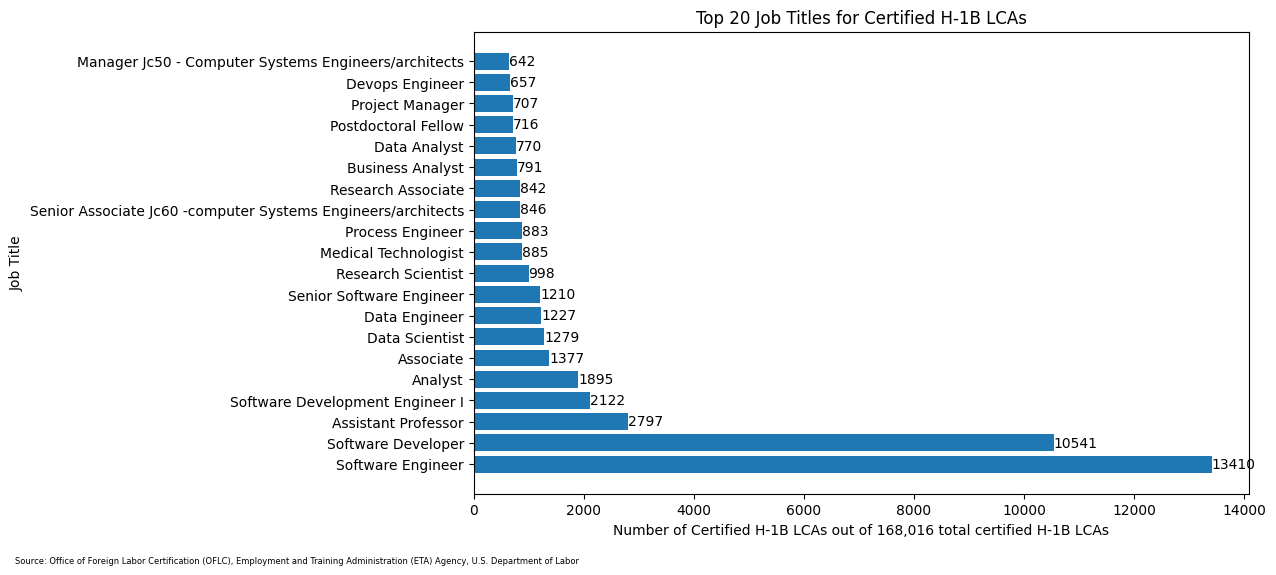

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(certified_h1b['JOB_TITLE'].value_counts()[0:20].index, certified_h1b['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs out of {certified_h1b['CASE_NUMBER'].nunique():,} total certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

In [32]:
certified_h1b['PREVAILING_WAGE'].info()

<class 'pandas.core.series.Series'>
Index: 180307 entries, 185 to 633892
Series name: PREVAILING_WAGE
Non-Null Count   Dtype  
--------------   -----  
180306 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


In [33]:
# let's see what the prevailing wage was for all of the entries whose unit of pay was the 'Year'
certified_h1b_year = certified_h1b[certified_h1b['PW_UNIT_OF_PAY'] == 'Year']
certified_h1b_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171035 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     171035 non-null  object        
 1   CASE_STATUS                     171035 non-null  object        
 2   RECEIVED_DATE                   171035 non-null  datetime64[ns]
 3   DECISION_DATE                   171035 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      171035 non-null  object        
 6   JOB_TITLE                       171035 non-null  object        
 7   SOC_CODE                        171035 non-null  object        
 8   SOC_TITLE                       171035 non-null  object        
 9   FULL_TIME_POSITION              171035 non-null  object        
 10  BEGIN_DATE                      171035 non-null  datetime64

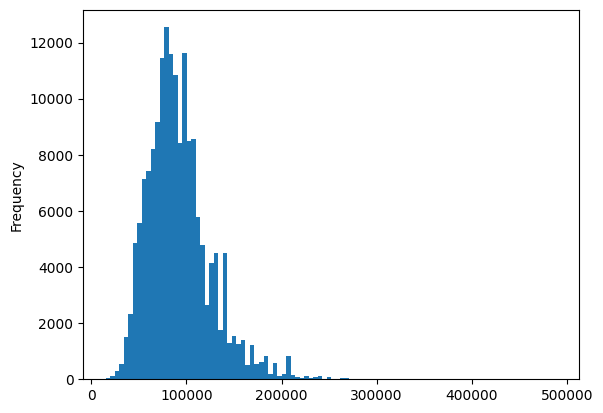

In [34]:
# let's see what the different PREVAILING_WAGE values are for the certified_h1b_year data frame
certified_h1b_year['PREVAILING_WAGE'].plot(kind='hist', bins=100);

In [35]:
# using the NAICS code, let's find out which employers were colleges and universities
colleges_and_universities = certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]
colleges_and_universities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16180 entries, 203 to 633809
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     16180 non-null  object        
 1   CASE_STATUS                     16180 non-null  object        
 2   RECEIVED_DATE                   16180 non-null  datetime64[ns]
 3   DECISION_DATE                   16180 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      16180 non-null  object        
 6   JOB_TITLE                       16180 non-null  object        
 7   SOC_CODE                        16180 non-null  object        
 8   SOC_TITLE                       16180 non-null  object        
 9   FULL_TIME_POSITION              16180 non-null  object        
 10  BEGIN_DATE                      16180 non-null  datetime64[ns]
 11  END_

In [36]:
certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]['EMPLOYER_NAME'].unique()

array(['University of Kentucky',
       'Administrators of the Tulane Educational Fund',
       'University of Georgia; OGE', ..., 'UNIVERSITY OF WEST ALABAMA',
       'Erikson Institute', 'Hillsdale College'], dtype=object)

In [37]:
dir(colleges_and_universities['EMPLOYER_NAME'].unique())

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [38]:
colleges_and_universities['EMPLOYER_NAME'].unique().__len__()

1062

In [39]:
colleges_and_universities['EMPLOYER_NAME'].unique().size

1062

In [40]:
colleges_and_universities['JOB_TITLE'].value_counts()

JOB_TITLE
Assistant Professor                                            2672
Postdoctoral Fellow                                             576
Research Associate                                              545
Postdoctoral Scholar                                            467
Postdoctoral Research Associate                                 457
                                                               ... 
Research Associate Pharmaceutical Sciences                        1
Asst Prof, Elem Edu W/ Emph On Children’s & Young Adult Lit       1
Research Scientist-academic                                       1
System Analyst And Programmer                                     1
Research Engineering/research Associate Iii                       1
Name: count, Length: 3491, dtype: int64

In [41]:
colleges_and_universities['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
The Leland Stanford, Jr University                 346
University of Michigan                             308
Columbia University                                247
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA         214
University of California, San Francisco            207
                                                  ... 
Louisiana State University - Eunice                  1
State University of New York - Purchase College      1
SUNY College at Plattsburgh                          1
Brooklyn Law School                                  1
Goshen College                                       1
Name: count, Length: 1062, dtype: int64

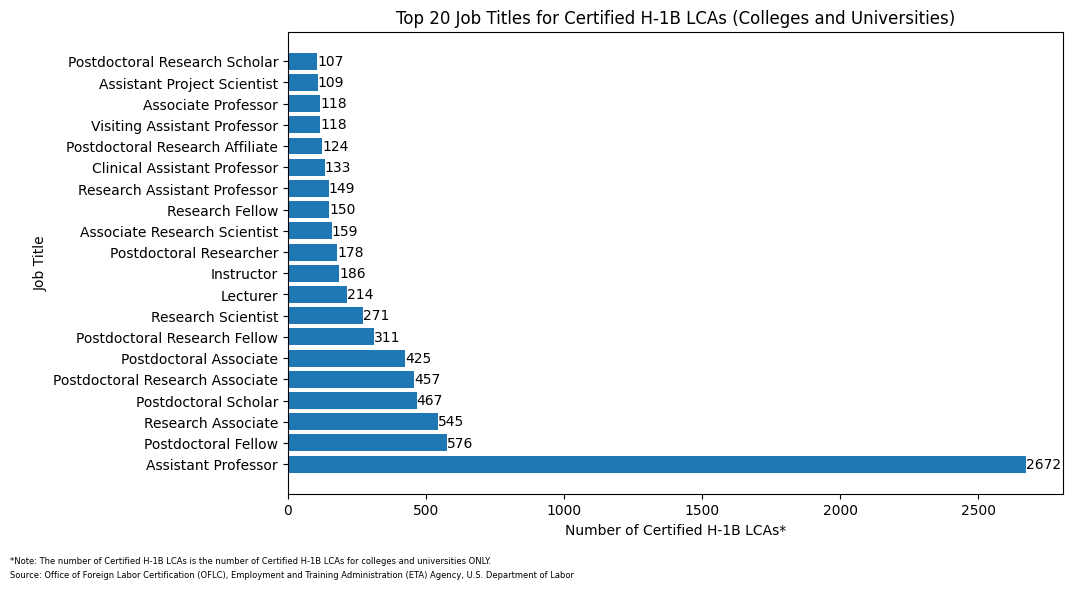

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(colleges_and_universities['JOB_TITLE'].value_counts()[0:20].index, colleges_and_universities['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs (Colleges and Universities)');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs*');
ax.annotate(text=f'*Note: The number of Certified H-1B LCAs is the number of Certified H-1B LCAs for colleges and universities ONLY.', xy=(0,0), xytext=(-200,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-200,-60), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

In [43]:
# let's see what the different job titles were for each given employer in the colleges_and_universities data frame
colleges_and_universities.groupby('EMPLOYER_NAME')['JOB_TITLE'].value_counts().sort_values(ascending=False)

EMPLOYER_NAME                                       JOB_TITLE                                                 
University of Michigan                              Postdoctoral Research Fellow                                  155
The Leland Stanford, Jr University                  Postdoctoral Research Affiliate                               124
University of California, San Francisco             Postdoctoral Scholar                                           89
Columbia University                                 Associate Research Scientist                                   72
Yale University                                     Associate Research Scientist                                   64
                                                                                                                 ... 
SUNY College of Environmental Science and Forestry  Assistant Professor - Sustainability Management                 1
                                                    Asst Prof-i

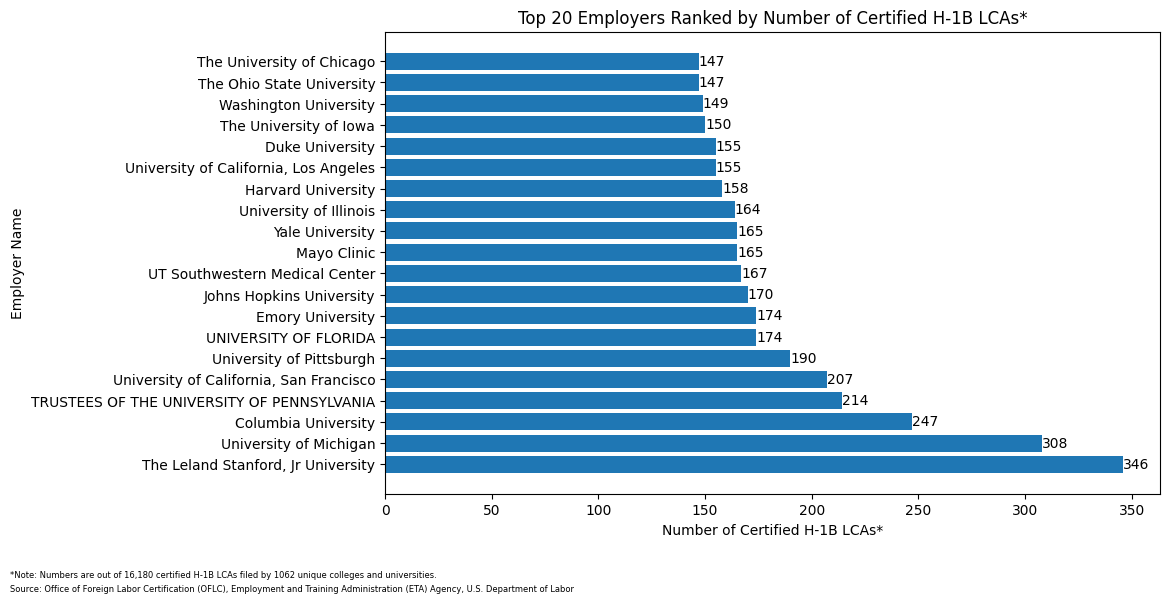

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(colleges_and_universities['EMPLOYER_NAME'].value_counts()[0:20].index, colleges_and_universities['EMPLOYER_NAME'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Employers Ranked by Number of Certified H-1B LCAs*');
ax.set_ylabel('Employer Name');
ax.set_xlabel(f'Number of Certified H-1B LCAs*');
ax.annotate(text=f'*Note: Numbers are out of {colleges_and_universities.shape[0]:,} certified H-1B LCAs filed by {colleges_and_universities['EMPLOYER_NAME'].unique().size} unique colleges and universities.', xy=(0,0), xytext=(-270,-60), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-270,-70), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


In [45]:
type(colleges_and_universities['EMPLOYER_NAME'].unique())

numpy.ndarray

In [46]:
# let's print out a table of the unique employer names
ls = [print(x) for x in colleges_and_universities['EMPLOYER_NAME'].unique()]

University of Kentucky
Administrators of the Tulane Educational Fund
University of Georgia; OGE
Lamar University
Harvard University
Cleveland State University
Cornell University
Louisiana State University and A&M College
Bard College
University of Pittsburgh
The University of Virginia
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA
Temple University--A Commonwealth University
University of Texas at Arlington
The University of Texas Health Science Center at Houston
WICHITA STATE UNIVERSITY
ALBANY MEDICAL COLLEGE
SOUTHERN METHODIST UNIVERSITY
The Trustees of Princeton University
Yale University
University of Minnesota
Gettysburg College
New York University
East Carolina University
University of Massachusetts Boston
University of California, Berkeley
Oregon State University
The University of Chicago
The Pennsylvania State University
Colorado Seminary
Emory University
Menlo College
Oklahoma State University
Duke University
Mayo Clinic
UNIVERSITY OF CALIFORNIA, SAN DIEGO
The University of Iowa
W

In [47]:
# let's find colleges and universities in Pennsylvania
colleges_and_universities['WORKSITE_STATE'].value_counts()

WORKSITE_STATE
CA    1831
TX    1404
NY    1399
PA     783
IL     715
      ... 
HI      21
PR      15
VI       3
GU       2
AK       1
Name: count, Length: 54, dtype: int64

In [48]:
colleges_and_universities_pa = colleges_and_universities[colleges_and_universities['WORKSITE_STATE'] == 'PA']
colleges_and_universities_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 833 to 632851
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     783 non-null    object        
 1   CASE_STATUS                     783 non-null    object        
 2   RECEIVED_DATE                   783 non-null    datetime64[ns]
 3   DECISION_DATE                   783 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      783 non-null    object        
 6   JOB_TITLE                       783 non-null    object        
 7   SOC_CODE                        783 non-null    object        
 8   SOC_TITLE                       783 non-null    object        
 9   FULL_TIME_POSITION              783 non-null    object        
 10  BEGIN_DATE                      783 non-null    datetime64[ns]
 11  END_DA

In [49]:
colleges_and_universities_pa['EMPLOYER_NAME'].nunique()

49

In [50]:
colleges_and_universities_pa['EMPLOYER_NAME'].unique()

array(['University of Pittsburgh',
       'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
       'Temple University--A Commonwealth University',
       'Gettysburg College', 'The Pennsylvania State University',
       'Carnegie Mellon University', 'Lehigh University',
       'Drexel University', 'Thomas Jefferson University',
       'Wright Center for Graduate Medical Education',
       'Mercyhurst University', 'Duquesne University',
       'Alvernia University', 'Widener University', 'Gannon University',
       'Eastern University', 'MICHIGAN STATE UNIVERSITY',
       'Bucknell University', 'URSINUS COLLEGE', 'Moravian University',
       'Haverford College', 'Villanova University', 'DeSales University',
       'Slippery Rock University of Pennsylvania',
       'COMMONWEALTH UNIVERSITY OF PENNSYLVANIA', 'Allegheny College',
       'Muhlenberg College', 'Temple University Hospital, Inc',
       'Arcadia University', 'Trustees of the University of Pennsylvania',
       'University of Roch

Using the Reuters article linked [here](https://www.reuters.com/markets/us/us-job-growth-slows-april-unemployment-rate-rises-39-2024-05-03/), let's find out about the companies that are classified as being in the healthcare sector using the NAICS classification system.

In [51]:
# let's find out which companies are in the healthcare sector using the NAICS codes
healthcare = certified_h1b_year.copy()
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171035 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     171035 non-null  object        
 1   CASE_STATUS                     171035 non-null  object        
 2   RECEIVED_DATE                   171035 non-null  datetime64[ns]
 3   DECISION_DATE                   171035 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      171035 non-null  object        
 6   JOB_TITLE                       171035 non-null  object        
 7   SOC_CODE                        171035 non-null  object        
 8   SOC_TITLE                       171035 non-null  object        
 9   FULL_TIME_POSITION              171035 non-null  object        
 10  BEGIN_DATE                      171035 non-null  datetime64

In [52]:
# convert column to string to make searching easier
healthcare['NAICS_CODE'] = [str(x) for x in healthcare['NAICS_CODE']]
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171035 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     171035 non-null  object        
 1   CASE_STATUS                     171035 non-null  object        
 2   RECEIVED_DATE                   171035 non-null  datetime64[ns]
 3   DECISION_DATE                   171035 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      171035 non-null  object        
 6   JOB_TITLE                       171035 non-null  object        
 7   SOC_CODE                        171035 non-null  object        
 8   SOC_TITLE                       171035 non-null  object        
 9   FULL_TIME_POSITION              171035 non-null  object        
 10  BEGIN_DATE                      171035 non-null  datetime64

In [53]:
type(healthcare['NAICS_CODE'].values[0])

str

In [54]:
# 62 is sector 62 according to the NAICS
healthcare_companies = healthcare[healthcare['NAICS_CODE'].str.startswith('62')]
healthcare_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7765 entries, 185 to 633858
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     7765 non-null   object        
 1   CASE_STATUS                     7765 non-null   object        
 2   RECEIVED_DATE                   7765 non-null   datetime64[ns]
 3   DECISION_DATE                   7765 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      7765 non-null   object        
 6   JOB_TITLE                       7765 non-null   object        
 7   SOC_CODE                        7765 non-null   object        
 8   SOC_TITLE                       7765 non-null   object        
 9   FULL_TIME_POSITION              7765 non-null   object        
 10  BEGIN_DATE                      7765 non-null   datetime64[ns]
 11  END_D

In [55]:
healthcare_companies['NAICS_CODE'].unique()

array(['622110', '621610', '621498', '621340', '62199', '62211', '621111',
       '62151', '622310', '62111', '621210', '6216', '62134', '621511',
       '624410', '621330', '62121', '621399', '6221', '6211', '62161',
       '62411', '6232', '624110', '622210', '621410', '62142', '621999',
       '621112', '621320', '623990', '6213', '624190', '62149', '6223',
       '6215', '621991', '62133', '621491', '623110', '62399', '621420',
       '623220', '624229', '6241', '62419', '623210', '621492', '6214',
       '624120', '623312', '621512', '62231', '62131', '6219', '621493',
       '624230', '62139', '624210', '6243', '6212', '621391', '62412',
       '623311', '621310', '6242', '624310', '62141', '624221', '62422',
       '62132'], dtype=object)

In [56]:
# let's see what companies are in the healthcare sector in PA
healthcare_companies_pa = healthcare_companies[healthcare_companies['WORKSITE_STATE'] == 'PA']
healthcare_companies_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 1011 to 628518
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     517 non-null    object        
 1   CASE_STATUS                     517 non-null    object        
 2   RECEIVED_DATE                   517 non-null    datetime64[ns]
 3   DECISION_DATE                   517 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      517 non-null    object        
 6   JOB_TITLE                       517 non-null    object        
 7   SOC_CODE                        517 non-null    object        
 8   SOC_TITLE                       517 non-null    object        
 9   FULL_TIME_POSITION              517 non-null    object        
 10  BEGIN_DATE                      517 non-null    datetime64[ns]
 11  END_D

In [57]:
healthcare_companies_pa['EMPLOYER_NAME'].unique()

array(['Centerville Clinics, Inc.', 'Pinnacle Health Medical Services',
       'Department of Veterans Affairs',
       'University of Pittsburgh Physicians',
       'Revolutionary Home Health, Inc.', "DRISCOLL CHILDREN'S HOSPITAL",
       'Aviva Mental Health Services, Inc.',
       'UPMC Presbyterian Shadyside',
       "The Children's Hospital of Philadelphia",
       'North Penn Comprehensive Health Services', 'ABZDENTAL PLLC',
       'MedAmerica, Inc.', 'Laboratory Corporation of America',
       'Blue Bell Dental Associates PC', 'WellSpan Medical Group',
       'DLP Conemaugh Physician Services LLC', 'UPMC Passavant',
       'Women Against Abuse, Inc.', 'UPMC Pinnacle Hospitals',
       'Smile Team PC', 'Thomas Jefferson University Hospital',
       'Best Behavioral Healthcare, Inc.',
       'DLP Conemaugh Physician Practices, LLC', 'Dental Dreams LLC',
       "UPMC Children's Hospital of Pittsburgh",
       'OMNI Health Services, Inc.', 'Guthrie Medical Group P.C.',
       'Geisi

In [58]:
healthcare_companies_pa['JOB_TITLE'].unique()

array(['Family Medicine Physician', 'Pain Management',
       'Cardiologist (electrophysiologist)',
       'Assistant Professor- Cardiology', 'Registered Nurse Case Manager',
       'Pediatric Resident - Elective Rotation', 'Hr Manager',
       'Software Engineer - Tech Lead', 'Postdoctoral Fellow',
       'Research Associate', 'Software Developer Dental',
       'Data Scientist (remote)', 'Senior Bioinformatics Specialist',
       'Medical & Healthcare Manager', 'Medical Lab Scientist',
       'Physician, Family Medicine', 'Internal Medicine Physician',
       'Bioinformatics Scientist', 'Clinical Nurse Manager',
       'Clinical Scientist', 'Director Of Evaluation And Learning',
       'Clinical Fellow', 'Medical Physicist', 'General Dentist',
       'Fellow', 'Mental Health Professional',
       'Physicians Assistant, Specialist', 'Noninvasive Cardiologist',
       'Dentist', 'Pulmonary/critical Care Physician',
       'Psychology Fellow Associate', 'Behavioral Health Counselor',
  

In [59]:
healthcare_companies_pa['JOB_TITLE'].value_counts()

JOB_TITLE
Direct Care Professional                    55
Resident - Internal Medicine                21
Medical Resident (internal Medicine)        17
Hospitalist                                 15
Hospitalist Physician                       11
                                            ..
Medical Resident (general Surgery)           1
Physician, Family Medicine                   1
Child And Adolescent Psychiatrist            1
Therapist                                    1
Episode Of Care/value Based Care Analyst     1
Name: count, Length: 206, dtype: int64

In [60]:
healthcare_companies_pa.reset_index(drop=True, inplace=True)
healthcare_companies_pa

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23265-371069,Certified,2023-09-22,2023-09-29,NaT,H-1B,Family Medicine Physician,29-1215.00,Family Medicine Physicians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-23265-373139,Certified,2023-09-22,2023-09-29,NaT,H-1B,Pain Management,29-1229.00,"Physicians, All Other",Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
2,I-200-23264-366438,Certified,2023-09-21,2023-09-28,NaT,H-1B,Cardiologist (electrophysiologist),29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business and Employment,NaN,NaN,NaN,NaN,NaN
3,I-200-23263-362681,Certified,2023-09-20,2023-09-27,NaT,H-1B,Assistant Professor- Cardiology,29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
4,I-200-23262-360315,Certified,2023-09-19,2023-09-26,NaT,H-1B,Registered Nurse Case Manager,29-1141.00,Registered Nurses,Y,...,No,NaN,NaN,NaN,Disclose Business,Buccceroni,Mandi,B,Reger Rizzo Darnall LLP,mbucceroni@regerlaw.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,I-200-22279-514406,Certified,2022-10-06,2022-10-14,NaT,H-1B,Senior Medical Physicist,19-2012.00,Physicists,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
513,I-200-22278-512063,Certified,2022-10-05,2022-10-13,NaT,H-1B,Hospitalist Physician,29-1229.02,Hospitalists,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
514,I-200-22273-504122,Certified,2022-09-30,2022-10-07,NaT,H-1B,Research Postdoctoral Fellow,17-2144.00,"Mechanical Engineers, R&D",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
515,I-200-22272-500957,Certified,2022-09-29,2022-10-06,NaT,H-1B,Post Doctoral Fellow,19-1029.02,Molecular and Cellular Biologists,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [61]:
data[data['EMPLOYER_NAME'].str.startswith('Stat')]['EMPLOYER_NAME'].unique()

array(['Statminds, LLC', 'State Street Bank and Trust Company',
       'State University of New York- Buffalo State College',
       'Statsig, Inc.', 'State University of New York at Oswego',
       'State of Wisconsin Investment Board',
       'State University of New York at Upstate Medical University',
       'State University of New York at Stony Brook', 'Static IQ Corp',
       'State Street Corporation',
       "State Attorney's Office, 15th Judicial Circuit",
       'State of Vermont', 'State University of New York at Potsdam',
       'State University of New York Downstate Health Sciences University',
       'State Farm Mutual Automobile Insurance Company',
       'State Street Corproation',
       'State University of New York at Binghamton',
       'State University of New York at Canton',
       'State of Arizona Department of Environmental Quality',
       'State of Washington Department of Ecology',
       'State Electric Company',
       'State University of New York at O

In [62]:
healthcare_companies_pa[healthcare_companies_pa.index.isin([9, 12, 17, 43, 44, 52, 62])]['EMPLOYER_NAME']

9     The Children's Hospital of Philadelphia
12                           MedAmerica, Inc.
17    The Children's Hospital of Philadelphia
43    The Children's Hospital of Philadelphia
44    The Children's Hospital of Philadelphia
52    The Children's Hospital of Philadelphia
62    The Children's Hospital of Philadelphia
Name: EMPLOYER_NAME, dtype: object

### TODO: Use [this function](https://docs.python.org/3/library/string.html#string.capwords) to combine duplicate values in the JOB_TITLE field of the dataset

In [63]:
# Use the capwords method to capitalize the first letter of each word in the string
data['JOB_TITLE'] = [string.capwords(x, sep=None) for x in data['JOB_TITLE']]

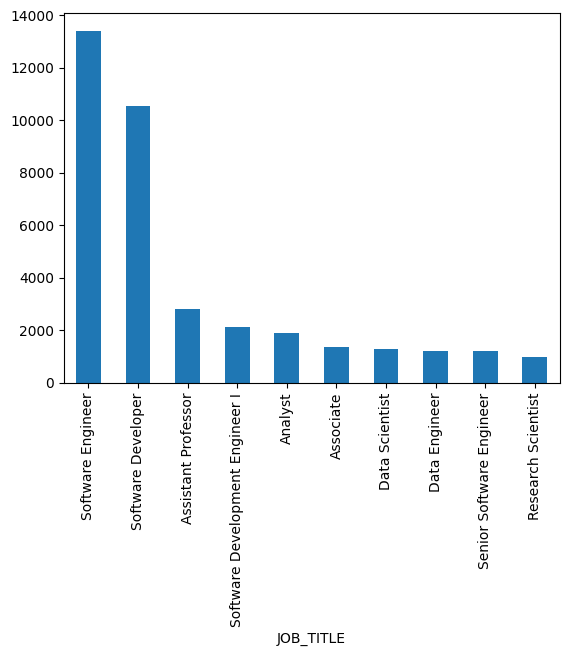

In [64]:
certified_h1b['JOB_TITLE'].value_counts()[0:10].plot(kind='bar');

In [65]:
# Let's convert all of the entries in the JOB_TITLE column to title case
certified_h1b['JOB_TITLE'] = [x.title() for x in certified_h1b['JOB_TITLE']]

/var/folders/zy/1n1cqtl540n_747vnk5pgbrm0000gn/T/ipykernel_35348/3278227998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  certified_h1b['JOB_TITLE'] = [x.title() for x in certified_h1b['JOB_TITLE']]


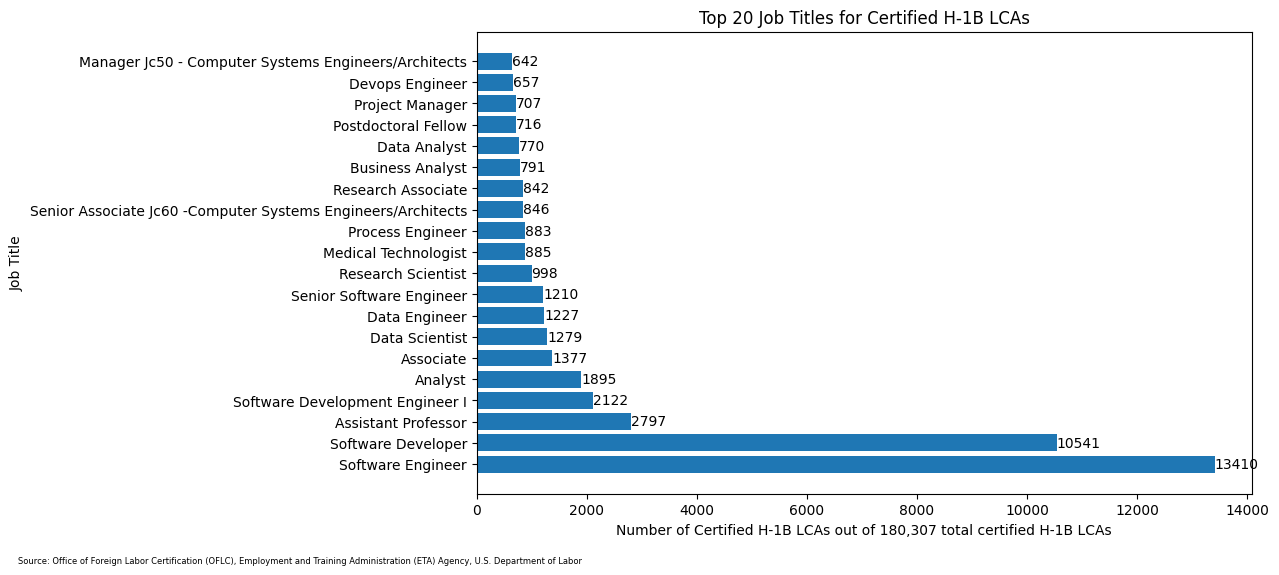

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(certified_h1b['JOB_TITLE'].value_counts()[0:20].index, certified_h1b['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs out of {certified_h1b.shape[0]:,} total certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


This doesn't even consider job titles such as "Principal Software Engineer" or "Lead Software Engineer".

Looking at the graph above, most of these roles fall into established STEM categories. Perhaps the roles that we can think about outside of STEM are the "Teacher" roles, "Postdoctoral Fellow" roles, and "Assistant Professor" roles. This begs the question, who is contributing the most to the LCAs that are filed for these roles? What fields or industries are they in?

Academia seems to be the most prevalent pathway for non-STEM people to stay in the U.S.

In [67]:
# I want to narrow down positions based on their relevance to STEM or non-STEM
# I will use the SOC codes for the job titles
# Let's see what those look like

certified_h1b['SOC_CODE'].unique()

array(['19-1042.00', '13-1111.00', '15-1252.00', '15-1251.00',
       '15-1299.00', '15-1299.08', '29-1216.00', '27-2022.00',
       '15-1244.00', '17-2051.00', '29-2011.00', '19-3051.00',
       '29-9099.00', '11-3121.00', '25-1052.00', '17-2141.00',
       '15-1253.00', '29-1031.00', '11-2021.00', '13-1199.00',
       '15-1211.00', '17-2112.00', '13-2054.00', '15-2051.01',
       '13-1041.07', '19-1029.02', '15-1299.05', '11-1021.00',
       '19-1032.00', '15-1243.01', '15-1242.00', '11-3021.00',
       '15-1243.00', '19-1029.01', '15-1299.09', '13-1082.00',
       '27-1021.00', '17-3011.00', '25-2031.00', '15-1254.00',
       '19-1022.00', '17-2061.00', '11-9041.00', '25-1126.00',
       '13-2011.00', '17-2112.02', '13-2099.04', '27-1011.00',
       '15-2051.00', '29-1141.00', '25-1021.00', '17-2072.00',
       '17-2112.03', '11-3031.00', '15-1212.00', '25-1011.00',
       '19-2031.00', '19-2012.00', '15-2041.00', '11-9033.00',
       '15-1255.00', '13-1081.00', '29-1051.00', '15-20

In [68]:
certified_h1b['SOC_CODE'].unique().size

736

In [69]:
certified_h1b['SOC_CODE'].nunique()

736

In [70]:
certified_h1b['SOC_TITLE'].nunique()

703

In [71]:
certified_h1b['SOC_TITLE'].unique()

array(['Medical Scientists, Except Epidemiologists',
       'Management Analysts', 'Software Developers',
       'Computer Programmers', 'Computer Occupations, All Other',
       'Computer Systems Engineers/Architects',
       'General Internal Medicine Physicians', 'Coaches and Scouts',
       'Network and Computer Systems Administrators', 'Civil Engineers',
       'Medical and Clinical Laboratory Technologists',
       'Urban and Regional Planners',
       'Healthcare Practitioners and Technical Workers, All Other',
       'Human Resources Managers', 'Chemistry Teachers, Postsecondary',
       'Mechanical Engineers',
       'Software Quality Assurance Analysts and Testers',
       'Dietitians and Nutritionists', 'Marketing Managers',
       'Business Operations Specialists, All Other',
       'Computer Systems Analysts', 'Industrial Engineers',
       'Financial Risk Specialists', 'Business Intelligence Analysts',
       'Regulatory Affairs Specialists',
       'Molecular and Cellula

In [72]:
certified_h1b[certified_h1b['SOC_TITLE'] == 'Software Engineer'].value_counts()

Series([], Name: count, dtype: int64)

In [73]:
certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].value_counts()

SOC_TITLE
Software Developers                                         51112
Software Quality Assurance Analysts and Testers              4526
Software Developers, Non R&D                                  115
SOFTWARE DEVELOPERS                                           114
Software Quality Assurance Engineers and Testers              109
Software Developers, R&D                                       69
Software Quality Assurance Analysts and Testers, R&D            8
Software Quality Assurance Analysts and Testers, Non R&D        7
SOFTWARE QUALITY ASSURANCE ANALYSTS AND TESTERS                 4
Software Developer                                              2
SoftwareDevelopers                                              2
Software Quality Assurance Analyst/Testers                      2
SOFTWARE DEVELOPERS, APPLICATIONS, NON R&D                      2
Software Developers, Applications, Non R&D                      1
Name: count, dtype: int64

In [74]:
certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].size

56073

We have uncovered that the H-1B certified roles for new employment that contain the word "software" in them total to $9,975$ out of the total $37,108$ roles that were awarded certified status for an H-1B Labor Condition Application.

In [75]:
# let's see how many full time positions that were applied for
data['FULL_TIME_POSITION'].value_counts()

FULL_TIME_POSITION
Y    634943
N      9664
Name: count, dtype: int64

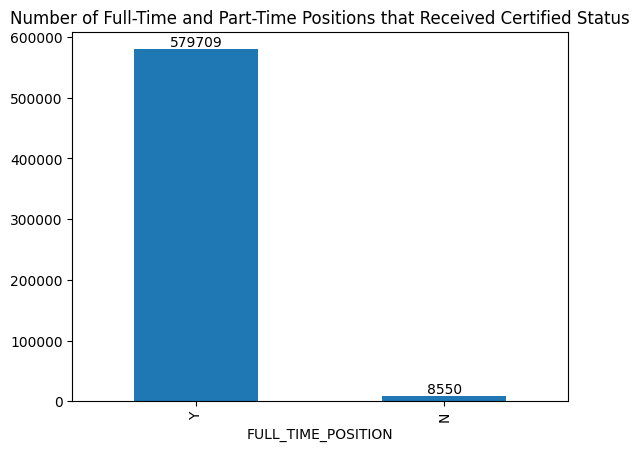

In [76]:
# let's see how many full-time and part-time positions received certified status
ax = data[data['CASE_STATUS'] == 'Certified']['FULL_TIME_POSITION'].value_counts().plot(kind='bar')
plt.title('Number of Full-Time and Part-Time Positions that Received Certified Status')
ax.bar_label(ax.containers[0]); # type: ignore

In [77]:
# for the roles that were given certified status and are part-time, let's find out what the job titles are
data[(data['CASE_STATUS'] == 'Certified') & (data['FULL_TIME_POSITION'] == 'N')]['JOB_TITLE'].value_counts()

JOB_TITLE
Software Developer              461
Software Engineer               231
Assistant Professor             188
Accountant                      164
Business Analyst                133
                               ... 
Project Designer - Interiors      1
Sr. Ux Architect                  1
Statisticians                     1
Architect Designer                1
Program Mgr/leo Lecturer I        1
Name: count, Length: 2688, dtype: int64

In [78]:
# Display the current time
print("Notebook run time:", datetime.datetime.now())

Notebook run time: 2024-05-20 20:29:27.652372
